In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [12]:
# CREATE DATA FRAME FROM SCRATCH
# Randomly generate an array and use pandas dataframe to create data frame
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape((6,6)),
    index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'],
    columns=['columns 1', 'columns 2', 'columns 3', 'columns 4', 'columns 5', 'columns 6'])
DF_obj.head

<bound method NDFrame.head of        columns 1  columns 2  columns 3  columns 4  columns 5  columns 6
row 1   0.870124   0.582277   0.278839   0.185911   0.411100   0.117376
row 2   0.684969   0.437611   0.556229   0.367080   0.402366   0.113041
row 3   0.447031   0.585445   0.161985   0.520719   0.326051   0.699186
row 4   0.366395   0.836375   0.481343   0.516502   0.383048   0.997541
row 5   0.514244   0.559053   0.034450   0.719930   0.421004   0.436935
row 6   0.281701   0.900274   0.669612   0.456069   0.289804   0.525819>

In [26]:
# create dataframe from extract files
# you can also read types of files such as .txt, .csv, .json
intro_df = pd.read_excel('cleveland.xlsx')
intro_df.set_index('A')
intro_df.head(5) # show on the first 5 rows

,A,B,C,D,E,E1,F,G,H,I,J,K,L,M
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [34]:
# import matplotlib to be able to schow different plot diagrams
import matplotlib.pylab as plt

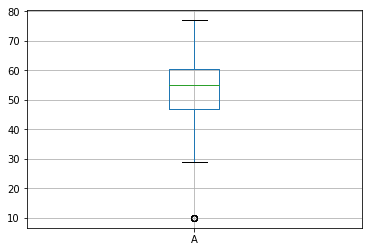

In [37]:
## check outliers for a colum
intro_df['A'] = intro_df['A'].apply(pd.to_numeric)
## use quantile plot to get the outlier
intro_df.loc[2:8, 'A']=10
intro_df[['A']].boxplot()
plt.show()

In [41]:
# remove outlier by identifying interquartile range
p25 = intro_df['A'].quantile(0.25)
print(p25)
p75 = intro_df['A'].quantile(0.75)
print(p75)

## new df equals interquartile range
new_df = intro_df[(intro_df['A']>p25)&(intro_df['A']<p75)]
new_df.head(5)

47.0
60.5


,A,B,C,D,E,E1,F,G,H,I,J,K,L,M
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
10,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
12,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
14,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0


In [47]:
## check specific values by columns
## create a target list and then check whether a column value is in the target list
list1 = ['4', '3']
intro_df_1 = intro_df[intro_df['C'].isin(list1)]
intro_df_1.head(6)

,A,B,C,D,E,E1,F,G,H,I,J,K,L,M
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,10,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,10,1,3,130,250,0,0,187,0,3.5,3,0,3,0
6,10,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,10,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,10,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [51]:
# sort dataframe by a specific colum
DF_sorted = DF_obj.sort_values(by=['columns 6'], ascending=[False])
DF_sorted.head(5)

,columns 1,columns 2,columns 3,columns 4,columns 5,columns 6
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376


In [55]:
# sort dataframe by multiple colums
DF_sorted_1 = DF_obj.sort_values(by=['columns 5', 'columns 6'], ascending=[False,False])
DF_sorted_1.head(6)

,columns 1,columns 2,columns 3,columns 4,columns 5,columns 6
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [57]:
## check the statistics of one column
DF_sorted['columns 6'].describe()

count    6.000000
mean     0.481650
std      0.342340
min      0.113041
25%      0.197265
50%      0.481377
75%      0.655844
max      0.997541
Name: columns 6, dtype: float64

In [59]:
# compare with scalr
# dataframe operate an element an element-wise comparison with the target value
DF_obj<0.5

,columns 1,columns 2,columns 3,columns 4,columns 5,columns 6
row 1,False,False,True,True,True,True
row 2,False,True,False,True,True,True
row 3,True,False,True,False,True,False
row 4,True,False,True,False,True,False
row 5,False,False,True,False,True,True
row 6,True,False,False,True,True,False


In [ ]:
from IPython.display import display, HTML # to display data frame

In [101]:
# check NaNs and fill with other value
# fill rows based on criteria
# concatenate data frames
# merge data frames
# group data frames based on colums

# check the quality of your data
missing = np.nan
DF_sorted_1.iloc[0:1] = missing
display(DF_sorted_1)

,columns 1,columns 2,columns 3,columns 4,columns 5,columns 6
row 5,NaN,NaN,NaN,NaN,NaN,NaN
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [102]:
# count the NaN in your data by columnb
print(DF_sorted_1.isnull().sum())

columns 1    1
columns 2    1
columns 3    1
columns 4    1
columns 5    1
columns 6    1
dtype: int64


In [103]:
# drop those NaN
DF_new = DF_sorted_1.dropna()
display(DF_new)

,columns 1,columns 2,columns 3,columns 4,columns 5,columns 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [110]:
## fill NaN with some values
filled_DF = DF_sorted_1.fillna(0)
display(filled_DF)


,columns 1,columns 2,columns 3,columns 4,columns 5,columns 6
row 5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [116]:
## fill with other value
filled_DF = DF_sorted_1.fillna({'columns 1': 0.1, 'columns 6': 1.25})
display(filled_DF)

,columns 1,columns 2,columns 3,columns 4,columns 5,columns 6
row 5,0.100000,NaN,NaN,NaN,NaN,1.250000
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [119]:
## drop duplicates
DF_obj_1 = DataFrame({'column 1': [1, 1, 1, 2, 3, 3, 3],
                     'column 2': ['a', 'a', 'a', 'b','d', 'd', 'c'],
                     'column 3': ['A', 'A', 'C', 'B', 'C', 'C', 'C']})
display(DF_obj_1)
display(DF_obj_1.drop_duplicates())

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,1,a,C
3,2,b,B
4,3,d,C
5,3,d,C
6,3,c,C


,column 1,column 2,column 3
0,1,a,A
2,1,a,C
3,2,b,B
4,3,d,C
6,3,c,C


In [127]:
## concantenate two data frame
# create dataframe 1
np.random.seed(1)
df1 = pd.DataFrame(np.random.randn(3,4))
display(df1)
# create dataframe 2
np.random.seed(1)
df2 = pd.DataFrame(np.random.randn(2,5))
display(df2)
# concatenate df1 and df2
df_conc = pd.concat((df1,df2))
display(df_conc)

,0,1,2,3
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141


,0,1,2,3,4
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370


,0,1,2,3,4
0,1.624345,-0.611756,-0.528172,-1.072969,NaN
1,0.865408,-2.301539,1.744812,-0.761207,NaN
2,0.319039,-0.249370,1.462108,-2.060141,NaN
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370


In [130]:
## merge two datframes on based on colums, similar to 'join' in database operation
df_merg = pd.merge(df1,df2, on=2)
display(df_merg)

,0_x,1_x,2,3_x,0_y,1_y,3_y,4
0,1.624345,-0.611756,-0.528172,-1.072969,1.624345,-0.611756,-1.072969,0.865408
